In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

file_path = 'Google_Stock_Price_Test.csv' 
data = pd.read_csv(file_path)
print(f'Length of data: {len(data)}')
print(data.head()) 

data = data['Open'].values.reshape(-1, 1)  

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 10  
X, y = create_sequences(data_scaled, sequence_length)

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

if X.shape[0] > 0:
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
else:
    print("No sequences created. Check your data and sequence length.")
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


Length of data: 20
       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400
Shape of X: (10, 10)
Shape of y: (10,)
Shape of X_train: (7, 10, 1)
Shape of y_train: (7,)


C:\Users\shrushti\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.4220 - val_loss: 0.7555
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.3638 - val_loss: 0.6785
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.3245 - val_loss: 0.6028
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.2862 - val_loss: 0.5277
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.2518 - val_loss: 0.4525
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.2022 - val_loss: 0.3771
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.1640 - val_loss: 0.3020
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.1187 - val_loss: 0.2286
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0976 - val_loss: 0.1589
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0747 - val_loss: 0.0966
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0495 - val_loss: 0.0465
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0290 - val_loss: 0.0144
Epo

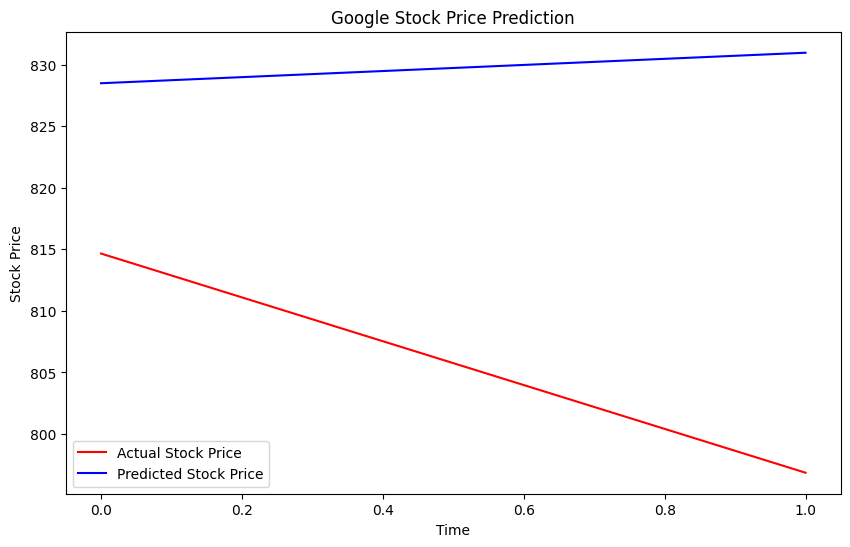

In [4]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='red', label='Actual Stock Price')
plt.plot(predicted, color='blue', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
model.save('lstm_stock_price_model.h5')

In [5]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test_actual, predicted)
mse = mean_squared_error(y_test_actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, predicted)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print(f"y_test_actual shape: {y_test_actual.shape}")
print(f"predicted shape: {predicted.shape}")


Mean Absolute Error (MAE): 23.96949218750001
Mean Squared Error (MSE): 677.3398670163215
Root Mean Squared Error (RMSE): 26.02575391830795
R² Score: -7.551191352308104
y_test_actual shape: (2, 1)
predicted shape: (2, 1)
